# Imports

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive, files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


# Mount Google Drive

In [2]:
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/AML/'
file = drive_path + 'iFood_data.csv'

Mounted at /content/drive


# Read the Dataset

In [ ]:
df = pd.read_csv(file, sep=',') # In this file, the separator is ";" instead of ","
print(df.shape)
pd.set_option('display.max_columns', 32)
df = df.drop_duplicates(subset=df.columns.difference(['ID']), keep='first')
df.shape

(2240, 29)


(2058, 29)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df['Response'].sum()

313

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2058 non-null   int64  
 1   Year_Birth           2058 non-null   int64  
 2   Education            2058 non-null   object 
 3   Marital_Status       2058 non-null   object 
 4   Income               2034 non-null   float64
 5   Kidhome              2058 non-null   int64  
 6   Teenhome             2058 non-null   int64  
 7   Dt_Customer          2058 non-null   object 
 8   Recency              2058 non-null   int64  
 9   MntWines             2058 non-null   int64  
 10  MntFruits            2058 non-null   int64  
 11  MntMeatProducts      2058 non-null   int64  
 12  MntFishProducts      2058 non-null   int64  
 13  MntSweetProducts     2058 non-null   int64  
 14  MntGoldProds         2058 non-null   int64  
 15  NumDealsPurchases    2058 non-null   int64 

# Data Preprocessing | Feature Engineering


In [ ]:
#Creating Responsiveness feature
df['Responsiveness'] = (df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])/5

# Living_With based on Marital_Status
df["LivesWithPartner"]=df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})


#Creating Age feature from Birth Year
df['Age']=2014 - df['Year_Birth']

#Creating total spent column -> total amount spent on pruducts
df['TotalSpent']=(df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])

#Creating feature 'Total Purchases', which is the sum of purchases across all platforms
df['TotalPurchases']=(df['NumWebPurchases'] + df['NumCatalogPurchases']+df['NumStorePurchases'])

#Creating Averagespent column
df['AverageSpent']=(df['TotalSpent']/df['TotalPurchases'] )

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')//10**9 # Date in epoch time

<ipython-input-10-bfb8781ee543>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["LivesWithPartner"]=df["Marital_Status"].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0, "Alone":0})


#Modifying Columns


In [ ]:
#Mofifying column Education, replacing '2n Cycle' values to 'Master'

df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Education'] = df['Education'].replace('Graduation','Bachelor')
df['Education'] = df['Education'].replace('Basic','HighSchool')
education = pd.DataFrame(df.groupby(by='Education').size())
education = education.reset_index()
education.rename(columns={0:'Count'}, inplace=True)


In [ ]:
#OrdinalEncoding Education
education_order = ['HighSchool', 'Bachelor', 'Master', 'PhD']

encoder = OrdinalEncoder(categories=[education_order])

df['EducationEncoded'] = encoder.fit_transform(df[['Education']])

#Dropping unnecessary columns

In [ ]:
#Dropping unnecessary columns
df.drop(columns=[ "Year_Birth", "Marital_Status", "Z_Revenue", "Z_CostContact"], inplace = True) #we deleted Z_Revenue and Z_CostContact because they contain only a single value Z_Revenue = 3 and Z_CostContact= 11
df.rename(columns = {'Response': 'AcceptedCmp6', "Dt_Customer": "JoinDateEpochTime"}, inplace = True)
df.drop(columns=['ID'], inplace=True) # We dropped the ID values, because they are not relevant in our further work

In [ ]:
#Distribution of Responsiveness

responsiveness=pd.DataFrame(df.groupby(by='Responsiveness').size())
responsiveness.reset_index()
responsiveness=responsiveness.rename(columns={0: 'Count'}).reset_index()
responsiveness.sort_values(by='Responsiveness', ascending=True)

,Responsiveness,Count
0,0.0,1627
1,0.2,304
2,0.4,77
3,0.6,40
4,0.8,10


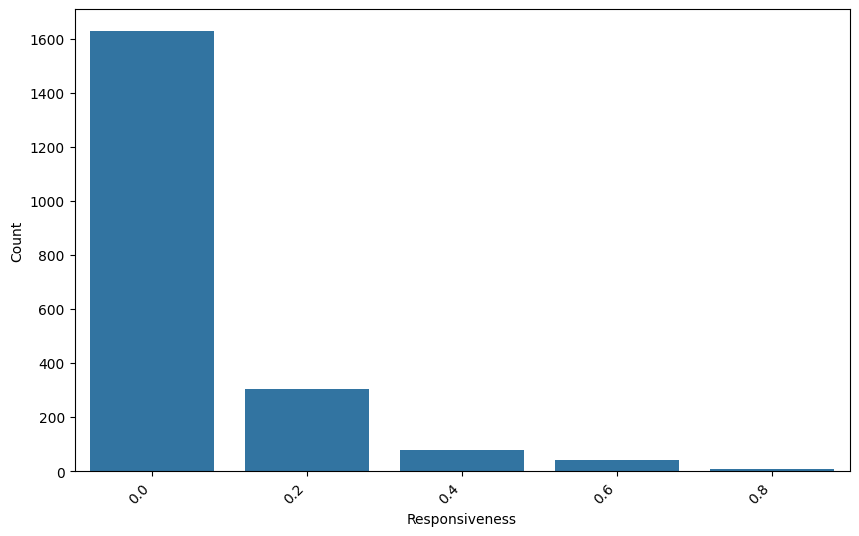

In [ ]:
#Distribution of responsiveness
plt.figure(figsize=(10,6))
sns.barplot(x='Responsiveness', y='Count', data=responsiveness)
plt.xticks(rotation=45, ha='right')
plt.show()

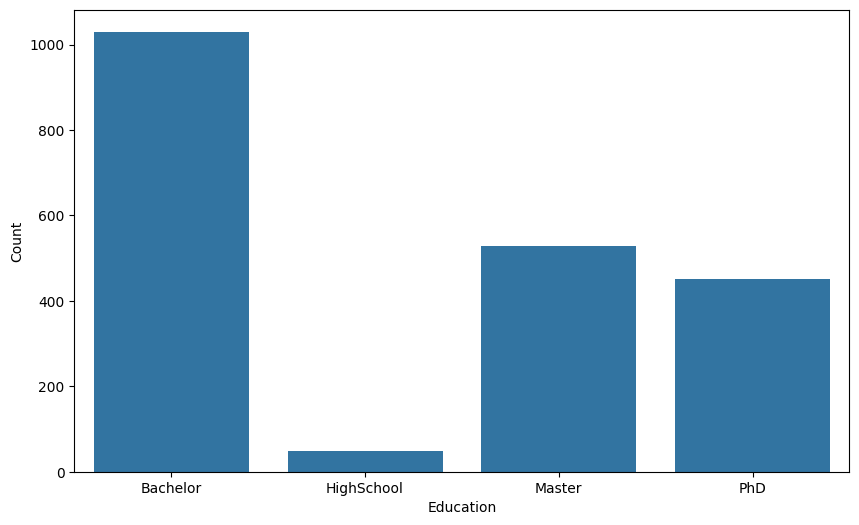

In [ ]:
#Distribution of Education
plt.figure(figsize=(10,6))
sns.barplot(x='Education', y='Count', data=education)
plt.show()

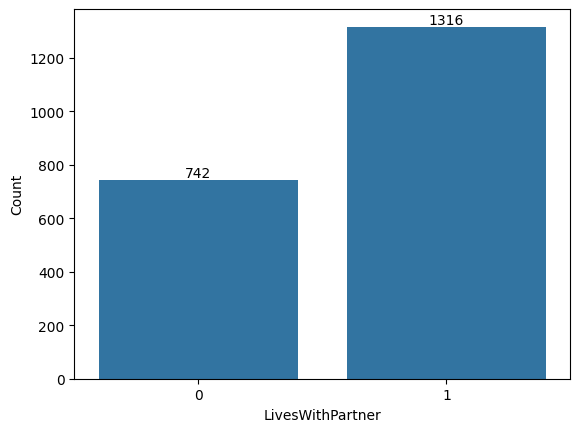

In [ ]:
status = pd.DataFrame(df.groupby(by='LivesWithPartner').size().reset_index())
status=status.rename(columns={0:'Count'})


ax=sns.barplot(x='LivesWithPartner', y='Count', data=status)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

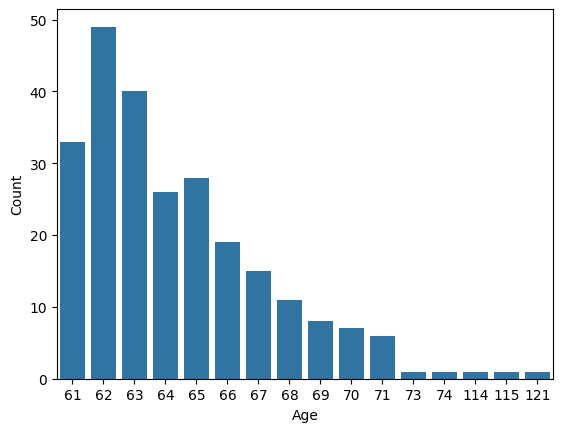

In [ ]:
filtage = df[df['Age']>60]
age = filtage.groupby(by='Age').size().reset_index()
age=age.rename(columns={0:'Count'})

ax=sns.barplot(x='Age', y='Count', data=age)


In [ ]:
df = df[df['Age']<100]
df.shape

(2055, 31)

In [ ]:
#df[df['Income']<600000]
df.head()

,Education,Income,Kidhome,Teenhome,JoinDateEpochTime,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Responsiveness,LivesWithPartner,Age,TotalSpent,TotalPurchases,AverageSpent,EducationEncoded
0,Bachelor,58138.0,0,0,1346716800,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0.0,0,57,1617,22,73.500000,1.0
1,Bachelor,46344.0,1,1,1394236800,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0.0,0,60,27,4,6.750000,1.0
2,Bachelor,71613.0,0,0,1377043200,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0.0,1,49,776,20,38.800000,1.0
3,Bachelor,26646.0,1,0,1391990400,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0.0,1,30,53,6,8.833333,1.0
4,PhD,58293.0,1,0,1390089600,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0.0,1,33,422,14,30.142857,3.0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(2052, 31)

In [ ]:
asd = df.groupby(by="Education")
print(asd['Income'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())

Education
Bachelor      52957.523576
HighSchool    19913.346939
Master        51205.522158
PhD           55960.966063
Name: Income, dtype: float64


<ipython-input-23-36d1403c7af7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Income'].fillna(df['Income'].mean())


In [ ]:
df = df[df['Income']<600000]
df.shape

(2051, 31)

In [ ]:
asd = df.groupby(by="Education")
asd['Income'].mean()

,Income
Education,
Bachelor,52354.194387
HighSchool,19913.346939
Master,51223.128624
PhD,55920.746623


In [ ]:
df

,Education,Income,Kidhome,Teenhome,JoinDateEpochTime,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Responsiveness,LivesWithPartner,Age,TotalSpent,TotalPurchases,AverageSpent,EducationEncoded
0,Bachelor,58138.0,0,0,1346716800,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0.0,0,57,1617,22,73.500000,1.0
1,Bachelor,46344.0,1,1,1394236800,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0.0,0,60,27,4,6.750000,1.0
2,Bachelor,71613.0,0,0,1377043200,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0.0,1,49,776,20,38.800000,1.0
3,Bachelor,26646.0,1,0,1391990400,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0.0,1,30,53,6,8.833333,1.0
4,PhD,58293.0,1,0,1390089600,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0.0,1,33,422,14,30.142857,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Bachelor,26816.0,0,0,1345161600,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,0.0,0,28,22,3,7.333333,1.0
2235,Bachelor,61223.0,0,1,1371081600,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,0.0,1,47,1341,16,83.812500,1.0
2237,Bachelor,56981.0,0,0,1390608000,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0.2,0,33,1241,18,68.944444,1.0
2238,Master,69245.0,0,1,1390521600,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,0.0,1,58,843,21,40.142857,2.0


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4faf74d69938b47bf55646c1991f8678438f8a551cbdfbbef39f9d82e52b3543
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
#from ydata_profiling import ProfileReport

# Creating Ydata Profile to understand the data prior to cleaning
#profile = ProfileReport(df)
#profile.to_file("output.html")

# Download the created profile
#files.download('output.html')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2051 non-null   object 
 1   Income               2051 non-null   float64
 2   Kidhome              2051 non-null   int64  
 3   Teenhome             2051 non-null   int64  
 4   JoinDateEpochTime    2051 non-null   int64  
 5   Recency              2051 non-null   int64  
 6   MntWines             2051 non-null   int64  
 7   MntFruits            2051 non-null   int64  
 8   MntMeatProducts      2051 non-null   int64  
 9   MntFishProducts      2051 non-null   int64  
 10  MntSweetProducts     2051 non-null   int64  
 11  MntGoldProds         2051 non-null   int64  
 12  NumDealsPurchases    2051 non-null   int64  
 13  NumWebPurchases      2051 non-null   int64  
 14  NumCatalogPurchases  2051 non-null   int64  
 15  NumStorePurchases    2051 non-null   int64 

In [ ]:
df.drop(columns=['Education'], inplace=True)
df.head()

,Income,Kidhome,Teenhome,JoinDateEpochTime,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Responsiveness,LivesWithPartner,Age,TotalSpent,TotalPurchases,AverageSpent,EducationEncoded
0,58138.0,0,0,1346716800,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0.0,0,57,1617,22,73.500000,1.0
1,46344.0,1,1,1394236800,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0.0,0,60,27,4,6.750000,1.0
2,71613.0,0,0,1377043200,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0.0,1,49,776,20,38.800000,1.0
3,26646.0,1,0,1391990400,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0.0,1,30,53,6,8.833333,1.0
4,58293.0,1,0,1390089600,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0.0,1,33,422,14,30.142857,3.0


In [ ]:
avginf = df[df['TotalPurchases']==0]
df.drop(avginf.index, inplace=True)

In [ ]:
df = df.fillna(0)

In [ ]:
isnan = df['AverageSpent'].isna().sum()

In [ ]:
isnan

0

In [ ]:
df.to_csv('Preprocessed.csv', index=False)
files.download('Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>